In [0]:
# dependencies
import os
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import *
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

input_file = "dbfs:/fall_2023_users/mb171/final_project/compressed/perf_95.snappy.parquet"

In [0]:
# load and verify the data is good
perf_95 = spark.read.parquet(input_file)
print(f"{'{:,}'.format(perf_95.count())} records of performance data collected.")
display(perf_95)
perf_95.printSchema()

216,499 records of performance data collected.


VM_instance window P95_CPU usage [%] P95_Memory usage [%] P95_Disk read throughput [KB/s] P95_Disk write throughput [KB/s] P95_Network received throughput [KB/s] P95_Network transmitted throughput [KB/s] 794 List(2013-09-11T00:00:00Z, 2013-09-11T04:00:00Z) 2.075 5.799998601277669 82.06666666666666 14.714285714285714 2.933333333333333 3.1333333333333333 794 List(2013-09-11T04:00:00Z, 2013-09-11T08:00:00Z) 2.1083333333333334 7.066663106282553 105.0 16.2 2.8666666666666667 3.1333333333333333 794 List(2013-09-11T08:00:00Z, 2013-09-11T12:00:00Z) 2.075 5.6666628519694004 122.0 15.266666666666667 2.8 3.1333333333333333 794 List(2013-09-11T12:00:00Z, 2013-09-11T16:00:00Z) 2.075 6.266663233439128 11.071428571428571 14.533333333333333 2.8666666666666667 3.2857142857142856 795 List(2013-08-12T12:00:00Z, 2013-08-12T16:00:00Z) 2.966666666666667 31.799888610839844 0.26666666666666666 9.733333333333333 0.9333333333333333 15.666666666666666 795 List(2013-08-12T16:00:00Z, 2013-08-12T20:00:00Z) 2.2666666666666666 26.799901326497395 0.13333333333333333 2.4 0.6666666666666666 12.4 795 List(2013-08-12T20:00:00Z, 2013-08-13T00:00:00Z) 2.966666666666667 18.466580708821613 19.533333333333335 3.066666666666667 0.06666666666666667 0.4 795 List(2013-08-13T00:00:00Z, 2013-08-13T04:00:00Z) 0.5 12.333221435546875 0.8 0.8666666666666667 0.06666666666666667 0.06666666666666667 795 List(2013-08-13T04:00:00Z, 2013-08-13T08:00:00Z) 7.1 29.199905395507812 0.9333333333333333 4.866666666666666 1.8666666666666667 47.53333333333333 795 List(2013-08-13T08:00:00Z, 2013-08-13T12:00:00Z) 4.233333333333333 32.533251444498696 80.13333333333334 9.4 0.4 8.2 795 List(2013-08-13T12:00:00Z, 2013-08-13T16:00:00Z) 0.8 16.79993947347005 4.933333333333334 4.533333333333333 0.2 0.7333333333333333 795 List(2013-08-13T16:00:00Z, 2013-08-13T20:00:00Z) 0.5 13.666534423828125 0.07142857142857142 1.8666666666666667 0.06666666666666667 0.07142857142857142 795 List(2013-08-13T20:00:00Z, 2013-08-14T00:00:00Z) 0.7666666666666667 15.133221944173178 2.7333333333333334 2.2142857142857144 0.06666666666666667 0.14285714285714285 795 List(2013-08-14T00:00:00Z, 2013-08-14T04:00:00Z) 1.8333333333333335 19.866549173990887 5.733333333333333 2.533333333333333 0.06666666666666667 0.13333333333333333 795 List(2013-08-14T04:00:00Z, 2013-08-14T08:00:00Z) 0.5 14.799919128417969 3.2666666666666666 1.6 0.06666666666666667 0.13333333333333333 795 List(2013-08-14T08:00:00Z, 2013-08-14T12:00:00Z) 0.5 12.733192443847658 0.2 2.4 0.06666666666666667 0.06666666666666667 795 List(2013-08-14T12:00:00Z, 2013-08-14T16:00:00Z) 3.5 24.66655731201172 9.333333333333334 10.8 0.06666666666666667 0.2 795 List(2013-08-14T16:00:00Z, 2013-08-14T20:00:00Z) 0.6 15.533231099446615 1.8666666666666667 2.2 0.06666666666666667 0.13333333333333333 795 List(2013-08-14T20:00:00Z, 2013-08-15T00:00:00Z) 0.8 18.533236185709637 3.3333333333333335 2.2666666666666666 0.06666666666666667 0.3333333333333333 795 List(2013-08-15T00:00:00Z, 2013-08-15T04:00:00Z) 0.5333333333333333 10.599924723307291 1.4285714285714286 2.2666666666666666 0.06666666666666667 0.06666666666666667 795 List(2013-08-15T04:00:00Z, 2013-08-15T08:00:00Z) 2.6 21.7999267578125 7.066666666666666 6.333333333333333 0.06666666666666667 0.3333333333333333 795 List(2013-08-15T08:00:00Z, 2013-08-15T12:00:00Z) 0.8 19.799880981445312 13.066666666666666 4.066666666666666 0.13333333333333333 0.6666666666666666 795 List(2013-08-15T12:00:00Z, 2013-08-15T16:00:00Z) 5.166666666666666 28.799896240234375 41.733333333333334 4.266666666666667 2.0 29.533333333333335 795 List(2013-08-15T16:00:00Z, 2013-08-15T20:00:00Z) 11.5 31.866594950358074 1.8 4.733333333333333 3.3333333333333335 73.2 795 List(2013-08-15T20:00:00Z, 2013-08-16T00:00:00Z) 3.3846153846153846 19.46654001871745 38.733333333333334 4.933333333333334 0.06666666666666667 0.3333333333333333 795 List(2013-08-16T00:00:00Z, 2013-08-16T04:00:00Z) 0.5 13.466555277506512 0.8666666666666667 2.466666666666667 0.06666666666666667 0.0666666666666666

root
 |-- VM_instance: string (nullable = true)
 |-- window: struct (nullable = true)
 |    |-- start: timestamp (nullable = true)
 |    |-- end: timestamp (nullable = true)
 |-- P95_CPU usage [%]: double (nullable = true)
 |-- P95_Memory usage [%]: double (nullable = true)
 |-- P95_Disk read throughput [KB/s]: double (nullable = true)
 |-- P95_Disk write throughput [KB/s]: double (nullable = true)
 |-- P95_Network received throughput [KB/s]: double (nullable = true)
 |-- P95_Network transmitted throughput [KB/s]: double (nullable = true)



In [0]:
# what are the most active VMs by metric

def get_ranked_counters(perf_df, metric):
    windowSpec = Window.orderBy(desc(f"avg_{metric}"))
    rankings = (
        perf_df
        .select("VM_instance", "window.end", metric)
        .groupBy("VM_instance")
        .agg(avg(metric).alias(f"avg_{metric}"))  # Calculate the average
        .orderBy(desc(f"avg_{metric}"))  # Order by the calculated average
        .select("VM_instance", row_number().over(windowSpec).alias("rank"))  # Add ranking
    )
    perf_counters = (
        perf_df
        .select("VM_instance", "window.end",metric)
        .join(rankings, perf_df.VM_instance == rankings.VM_instance)
        .orderBy(asc("rank"))
    )
    perf_counters = perf_counters.drop(rankings["VM_instance"])
    return perf_counters

ranked_perf_counters_CPU = get_ranked_counters(perf_95,"P95_CPU usage [%]")
ranked_perf_counters_Memory = get_ranked_counters(perf_95,"P95_Memory usage [%]")
display(ranked_perf_counters_CPU)


end P95_CPU usage [%] VM_instance rank 2013-08-12T16:00:00Z 99.06666666666666 970 1 2013-08-12T20:00:00Z 98.66666666666666 970 1 2013-08-13T00:00:00Z 98.73333333333333 970 1 2013-08-13T04:00:00Z 98.26666666666667 970 1 2013-08-13T08:00:00Z 99.2 970 1 2013-08-13T12:00:00Z 99.2 970 1 2013-08-13T16:00:00Z 98.73333333333333 970 1 2013-08-13T20:00:00Z 100.0 970 1 2013-08-14T00:00:00Z 99.86666666666666 970 1 2013-08-14T04:00:00Z 100.13333333333334 970 1 2013-08-14T08:00:00Z 100.06666666666666 970 1 2013-08-14T12:00:00Z 100.13333333333334 970 1 2013-08-14T16:00:00Z 100.13333333333334 970 1 2013-08-14T20:00:00Z 99.8 970 1 2013-08-15T00:00:00Z 99.8 970 1 2013-08-15T04:00:00Z 100.06666666666666 970 1 2013-08-15T08:00:00Z 102.33333333333334 970 1 2013-08-15T12:00:00Z 100.0 970 1 2013-08-15T16:00:00Z 100.4 970 1 2013-08-15T20:00:00Z 99.8 970 1 2013-08-16T00:00:00Z 99.33333333333334 970 1 2013-08-16T04:00:00Z 99.26666666666667 970 1 2013-08-16T08:00:00Z 101.53333333333335 970 1 2013-08-16T12:00:00Z 100.13333333333334 970 1 2013-08-16T16:00:00Z 100.4 970 1 2013-08-16T20:00:00Z 100.0 970 1 2013-08-17T00:00:00Z 100.26666666666667 970 1 2013-08-17T04:00:00Z 100.4 970 1 2013-08-17T08:00:00Z 99.86666666666666 970 1 2013-08-17T12:00:00Z 100.86666666666666 970 1 2013-08-17T16:00:00Z 100.46666666666665 970 1 2013-08-17T20:00:00Z 100.2 970 1 2013-08-18T00:00:00Z 100.46666666666665 970 1 2013-08-18T04:00:00Z 100.13333333333334 970 1 2013-08-18T08:00:00Z 101.4 970 1 2013-08-18T12:00:00Z 101.26666666666667 970 1 2013-08-18T16:00:00Z 100.33333333333334 970 1 2013-08-18T20:00:00Z 100.26666666666667 970 1 2013-08-19T00:00:00Z 100.46666666666665 970 1 2013-08-19T04:00:00Z 100.46666666666665 970 1 2013-08-19T08:00:00Z 103.4 970 1 2013-08-19T12:00:00Z 100.0 970 1 2013-08-19T16:00:00Z 100.4 970 1 2013-08-19T20:00:00Z 100.26666666666667 970 1 2013-08-20T00:00:00Z 100.33333333333334 970 1 2013-08-20T04:00:00Z 99.73333333333333 970 1 2013-08-20T08:00:00Z 100.93333333333334 970 1 2013-08-20T12:00:00Z 100.46666666666665 970 1 2013-08-20T16:00:00Z 100.53333333333335 970 1 2013-08-20T20:00:00Z 100.33333333333334 970 1 2013-08-21T00:00:00Z 100.4 970 1 2013-08-21T04:00:00Z 100.26666666666667 970 1 2013-08-21T08:00:00Z 100.33333333333334 970 1 2013-08-21T12:00:00Z 100.6 970 1 2013-08-21T16:00:00Z 100.53333333333335 970 1 2013-08-21T20:00:00Z 100.66666666666666 970 1 2013-08-22T00:00:00Z 100.53333333333335 970 1 2013-08-22T04:00:00Z 100.2 970 1 2013-08-22T08:00:00Z 100.46666666666665 970 1 2013-08-22T12:00:00Z 100.53333333333335 970 1 2013-08-22T16:00:00Z 100.6 970 1 2013-08-22T20:00:00Z 100.4 970 1 2013-08-23T00:00:00Z 100.26666666666667 970 1 2013-08-23T04:00:00Z 100.4 970 1 2013-08-23T08:00:00Z 100.4 970 1 2013-08-23T12:00:00Z 100.6 970 1 2013-08-23T16:00:00Z 100.46666666666665 970 1 2013-08-23T20:00:00Z 100.2 970 1 2013-08-24T00:00:00Z 100.53333333333335 970 1 2013-08-24T04:00:00Z 100.46666666666665 970 1 2013-08-24T08:00:00Z 99.93333333333334 970 1 2013-08-24T12:00:00Z 100.4 970 1 2013-08-24T16:00:00Z 101.26666666666667 970 1 2013-08-24T20:00:00Z 101.6 970 1 2013-08-25T00:00:00Z 101.0 970 1 2013-08-25T04:00:00Z 100.26666666666667 970 1 2013-08-25T08:00:00Z 100.4 970 1 2013-08-25T12:00:00Z 100.46666666666665 970 1 2013-08-25T16:00:00Z 100.6 970 1 2013-08-25T20:00:00Z 100.4 970 1 2013-08-26T00:00:00Z 100.53333333333335 970 1 2013-08-26T04:00:00Z 100.33333333333334 970 1 2013-08-26T08:00:00Z 100.4 970 1 2013-08-26T12:00:00Z 100.2 970 1 2013-08-26T16:00:00Z 100.26666666666667 970 1 2013-08-26T20:00:00Z 103.2 970 1 2013-08-27T00:00:00Z 99.86666666666666 970 1 2013-08-27T04:00:00Z 100.06666666666666 970 1 2013-08-27T08:00:00Z 102.0 970 1 2013-08-27T12:00:00Z 99.6 970 1 2013-08-27T16:00:00Z 100.8 970 1 2013-08-27T20:00:00Z 99.86666666666666 970 1 2013-08-28T00:00:00Z 100.86666666666666 970 1 2013-08-28T04:00:00Z 99.8 970 1 2013-08-28T08:00:00Z 99.0 970 1 2013-08-28T12:00:00Z 100.26666666666667 970 1 2013-08-28T16:00:00Z 100.86666666666666 970 1 2013-08-28T20:00:00Z 99.933

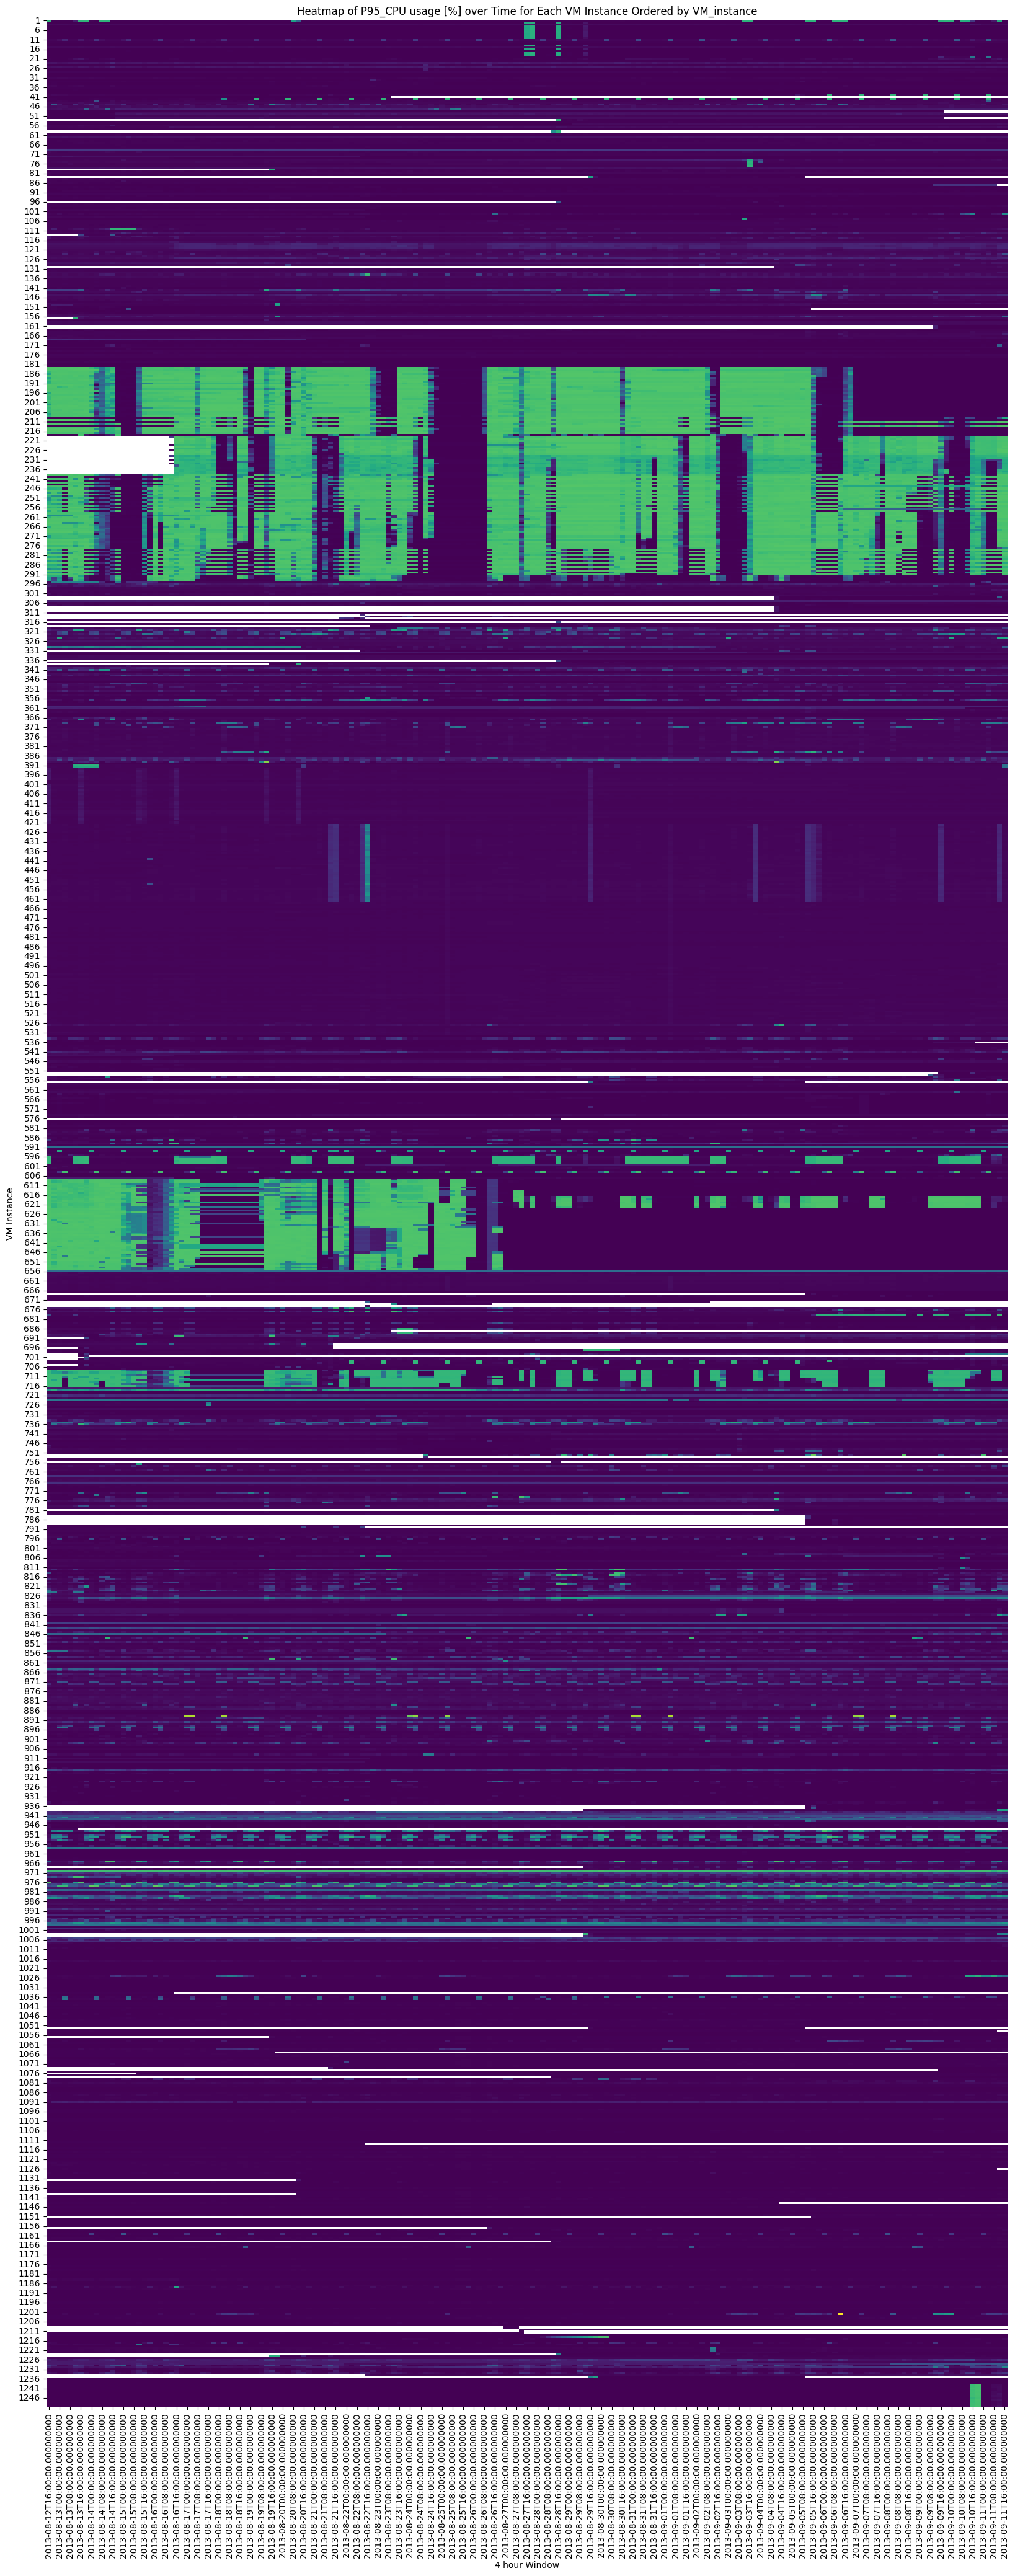

In [0]:
def perf_heatmap(df: DataFrame, metric: str, rank_metric: bool = False):
    df = df.toPandas()
    
    y_index = 'VM_instance'
    if(rank_metric):
        df.set_index('rank')
        y_index = 'rank'
    else:
        df['VM_instance'] = df['VM_instance'].astype(int)
        df.set_index('VM_instance')

    pivot_table = df.pivot(y_index, 'end', metric)
    pivot_table.sort_index(level=0, ascending=True, inplace=True)

    plt.figure(figsize=(20, 50))
    sns.heatmap(pivot_table, cmap='viridis', cbar=False)
    plt.title(f'Heatmap of {metric} over Time for Each VM Instance Ordered by {y_index}')
    plt.xlabel('4 hour Window')
    plt.ylabel('VM Instance')
    plt.show()


perf_heatmap(ranked_perf_counters_CPU,'P95_CPU usage [%]')

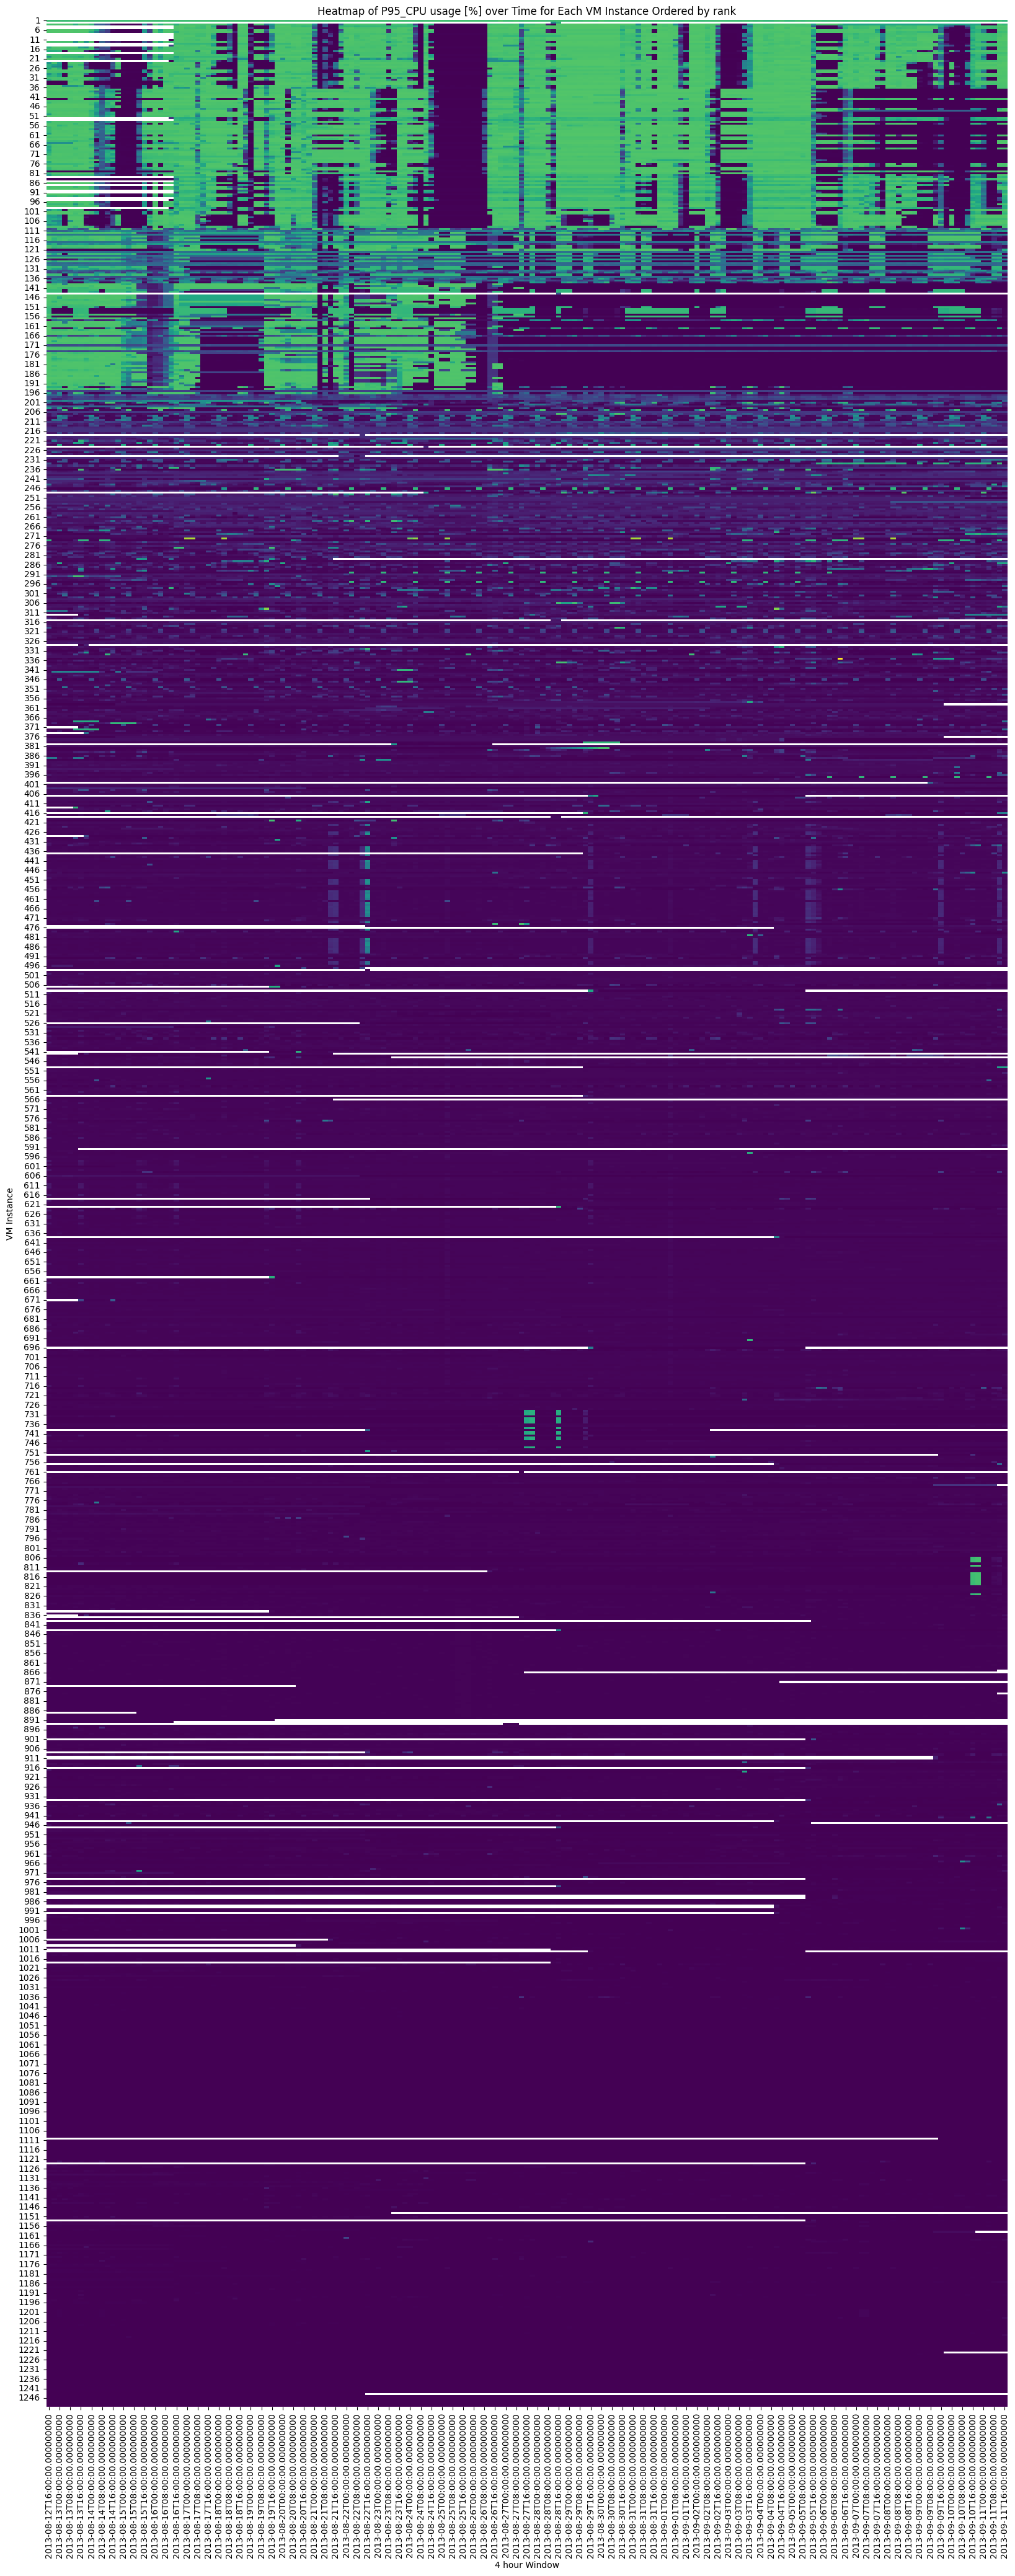

In [0]:
perf_heatmap(ranked_perf_counters_CPU,'P95_CPU usage [%]', True)

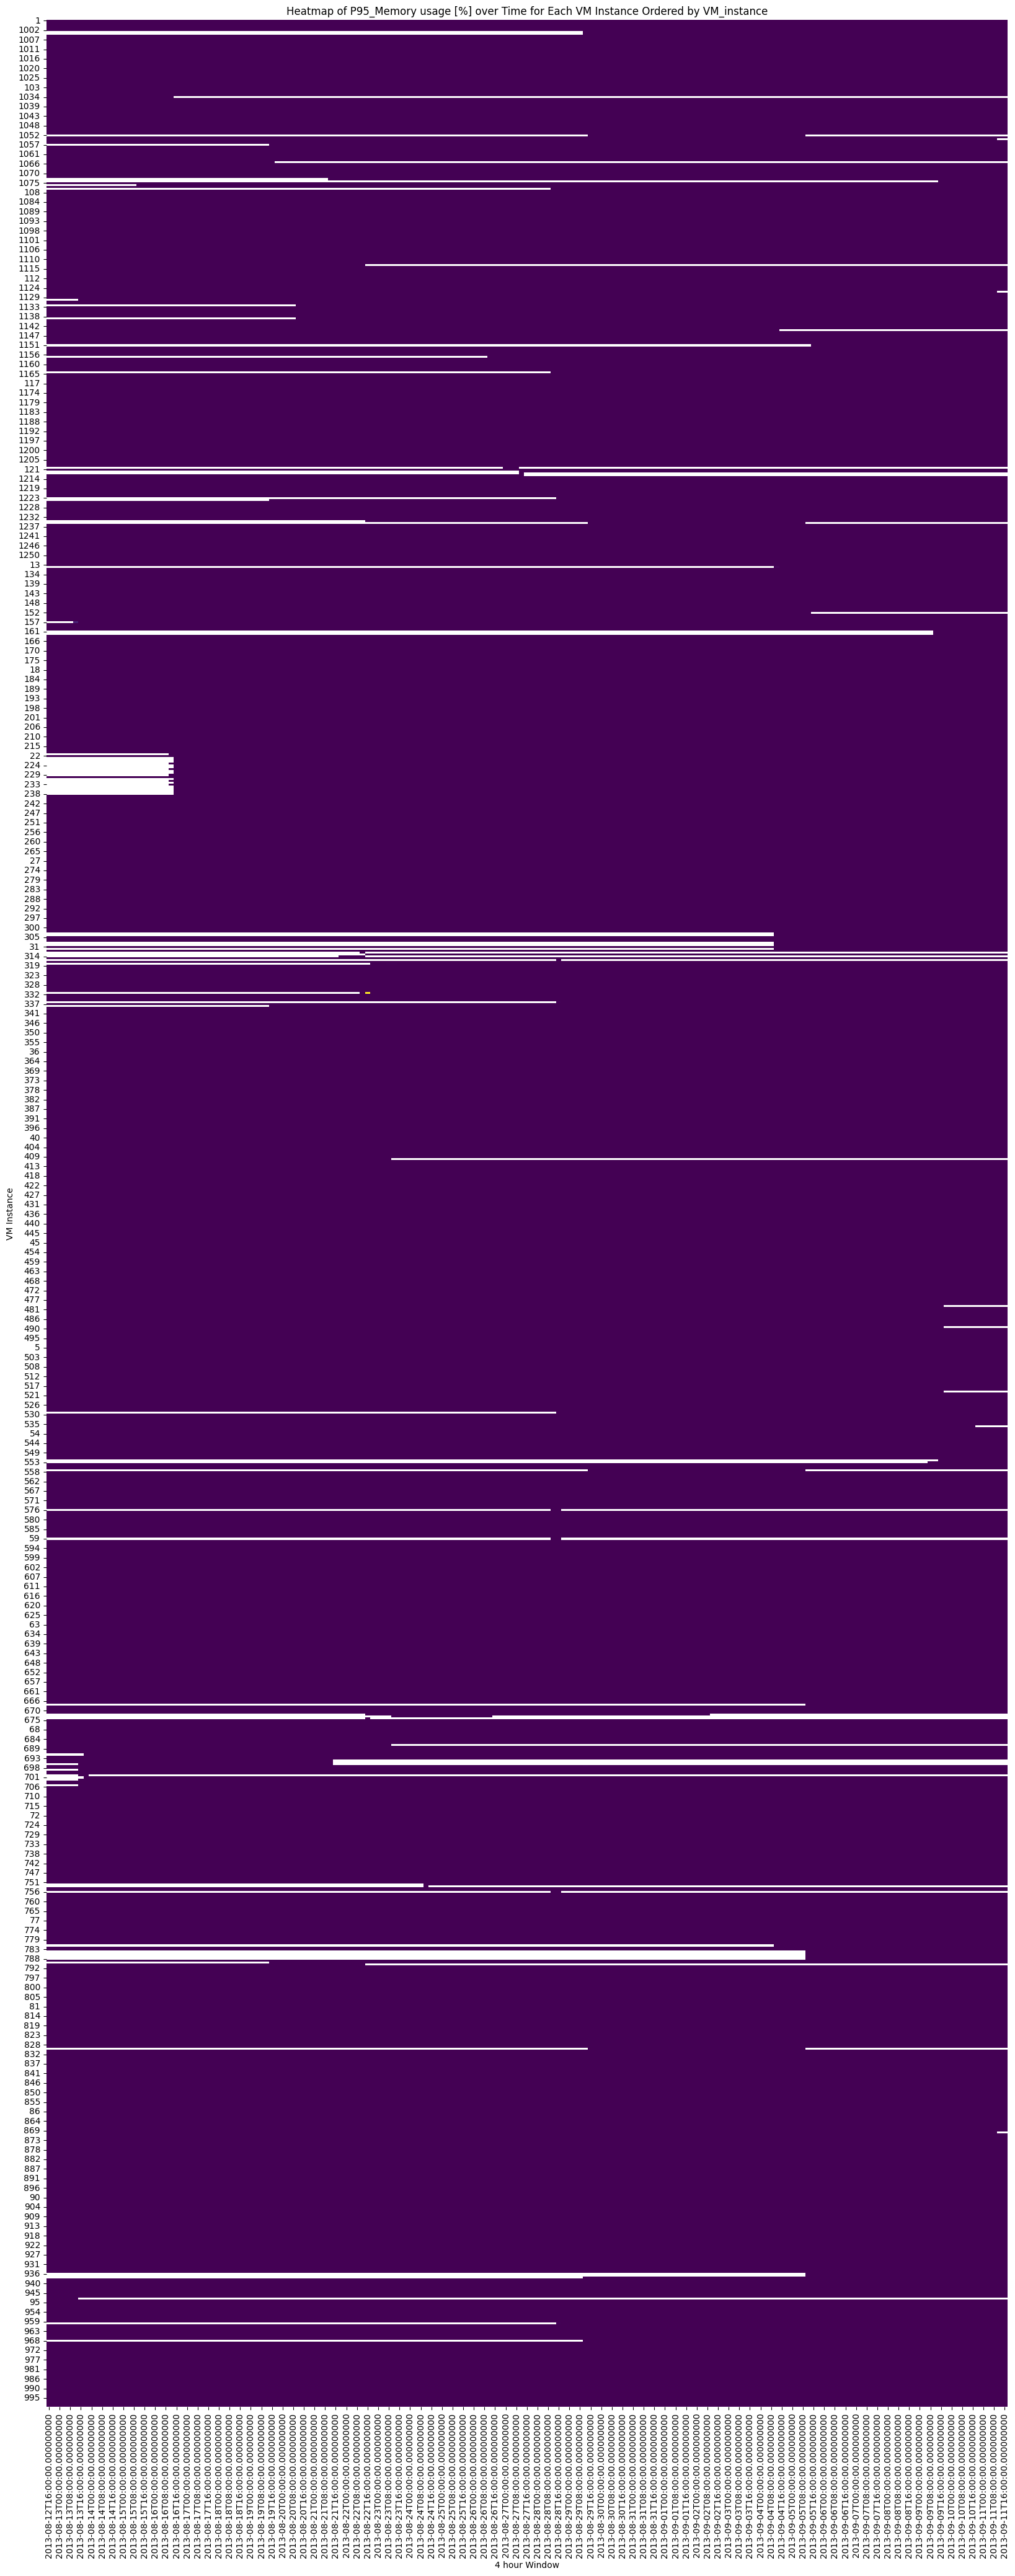

In [0]:
perf_heatmap(ranked_perf_counters_Memory,'P95_Memory usage [%]')

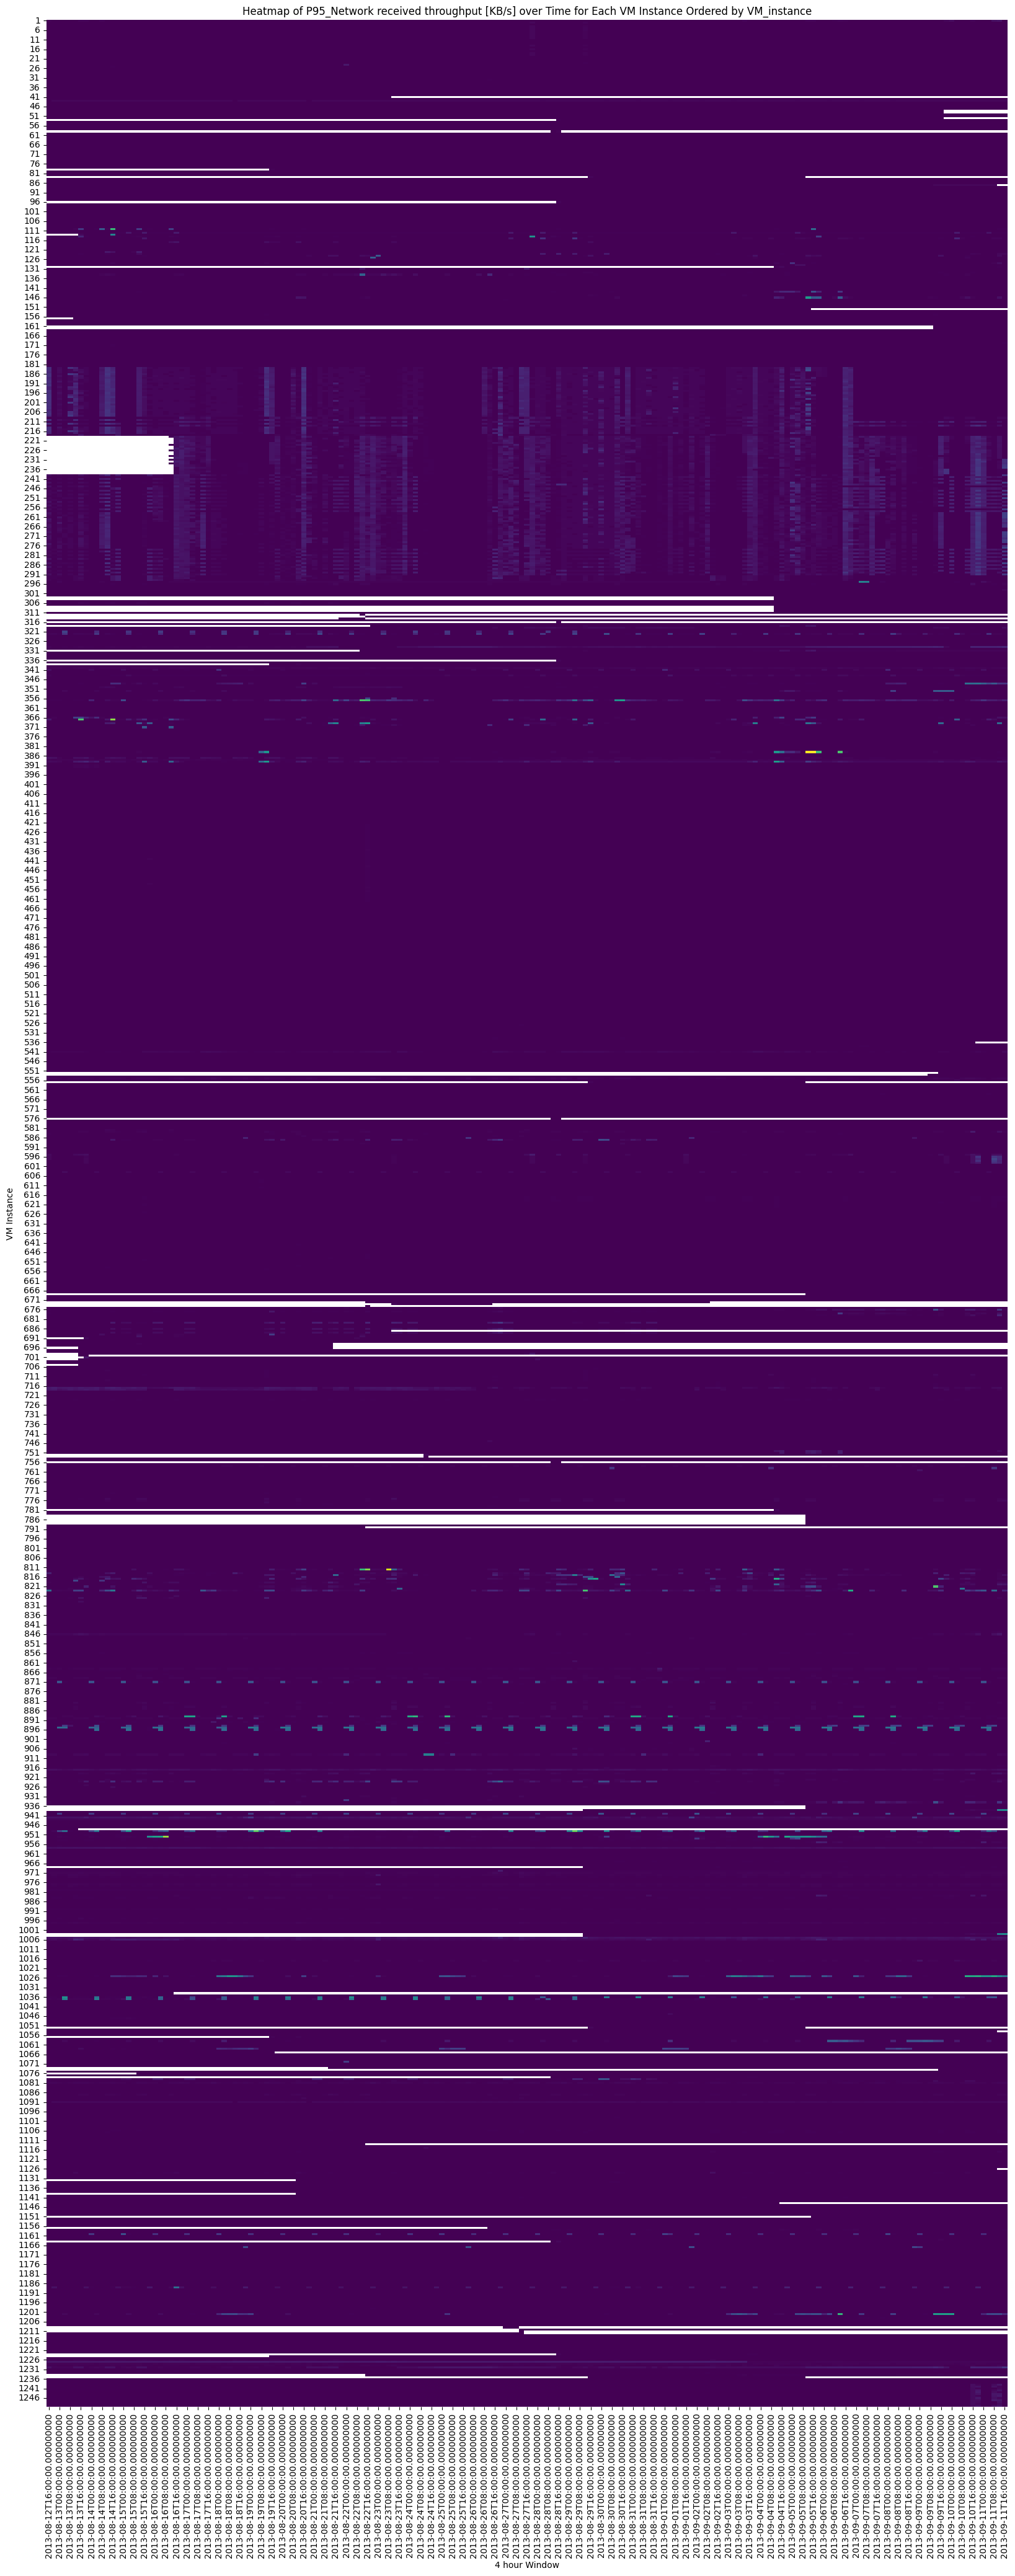

In [0]:
#  |-- P95_Disk read throughput [KB/s]: double (nullable = true)
#  |-- P95_Disk write throughput [KB/s]: double (nullable = true)
#  |-- P95_Network received throughput [KB/s]: double (nullable = true)
#  |-- P95_Network transmitted throughput [KB/s]: double (nullable = true)

# 
# metric = "P95_Disk read throughput [KB/s]"
# metric = "P95_Disk write throughput [KB/s]"
metric = "P95_Network received throughput [KB/s]"
# metric = "P95_Network transmitted throughput [KB/s]"
perf_heatmap(get_ranked_counters(perf_95,metric),metric)
